In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.join(os.path.dirname(os.path.curdir), '..'))
from gaussian_mixture.gaussian_mixture import GaussianMixture

In [2]:
def create_toy_data():
    x1 = np.random.normal(size=(100, 2))
    x1 += np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2))
    x2 += np.array([5, -5])
    x3 = np.random.normal(size=(100, 2))
    x3 += np.array([0, 5])
    return np.vstack((x1, x2, x3))

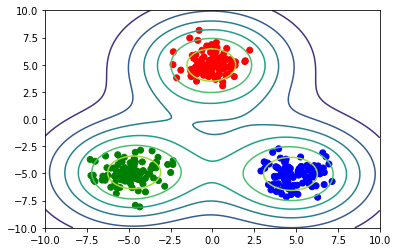

In [3]:
X = create_toy_data()

model = GaussianMixture(3)
model.fit(X, iter_max=100)
labels = model.classify(X)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.predict_proba(X_test)
Probs = probs.reshape(100, 100)
colors = ["red", "blue", "green"]
plt.scatter(X[:, 0], X[:, 1], c=[colors[int(label)] for label in labels])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()